In [109]:
# Linear Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('flats_prep.csv', sep=';')

In [3]:
df

,rooms,location,condition,m2,type,price
0,2.000000,0,0,3.912023,0,10.463103
1,1.000000,1,0,3.610918,0,10.463103
2,3.000000,0,0,4.204693,0,11.082143
3,1.981132,0,0,3.044522,0,9.615805
4,1.000000,0,0,4.406719,1,11.002100
...,...,...,...,...,...,...
208,2.000000,1,1,4.174387,1,10.745206
209,3.000000,1,1,4.430817,1,10.962631
210,3.000000,1,1,4.532599,1,11.059000
211,2.000000,1,1,4.276666,1,10.841951


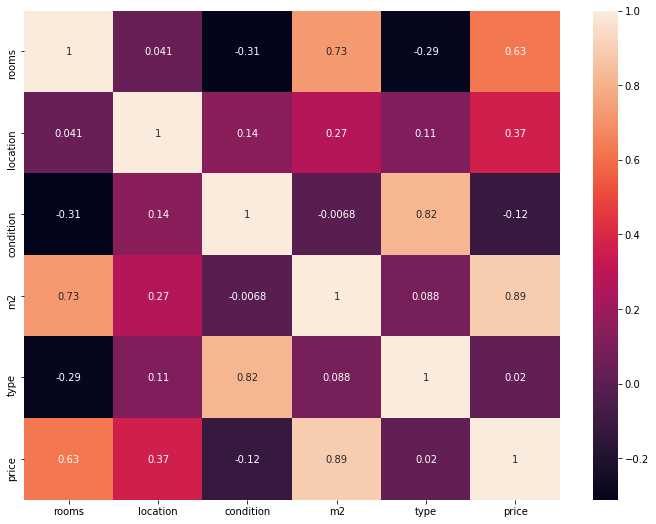

In [4]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [5]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [6]:
# Fitting Simple Linear Regression to the Training set (M2)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 3:4], y_train)

In [7]:
# Getting parameters
sr.coef_, sr.intercept_

(array([1.26900078]), 5.711239304266701)

In [8]:
# Predicting the Test set results
y_pred = sr.predict(X_test[:, 3:4])

In [9]:
# Coefficient of determination R^2
sr.score(X_train[:, 3:4], y_train), sr.score(X_test[:, 3:4], y_test)

(0.800605123830484, 0.7475994179235955)

In [10]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 3:4])), mean_squared_error(y_test, y_pred)

(0.0742787663201023, 0.059223104011784634)

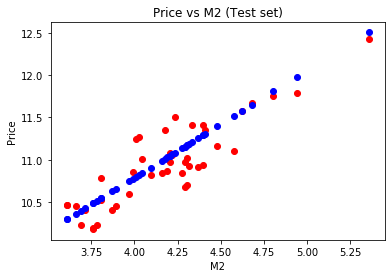

In [11]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], sr.predict(X_test[:, 3:4]), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [12]:
# Multiple Linear Regression, checking p-values
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           3.30e-63
Time:                        12:11:43   Log-Likelihood:                -1.8414
No. Observations:                 170   AIC:                             15.68
Df Residuals:                     164   BIC:                             34.50
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5963      0.272     20.606      0.000       5.060       6.133
x1            -0.0826      0.040     -2.066      0.040      -0.162      -0.004
x2             0.1912      0.047      4.027      0.000       0.097       0.285
x3            -0.3087      0.074     -4.160      0.000      -0.455      -0.162
x4             1.3403      0.086     15.526      0.000       1.170       1.511
x5             0.1034      0.084      1.233      0.219      -0.062       0.269
==============================================================================
Omnibus:                        5.277   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                2.950
Skew:                           0.055   Prob(JB):                        0.229
Kurtosis:                       2.364   Cond. No.                         75.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Backward Elimination with p-values
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

import statsmodels.api as sm         
SL = 0.01
X_Modeled = backwardElimination(X_train, y_train, SL)

In [24]:
X_train = X_train[:, 0:4]
X_test = X_test[:, 0:4]

In [25]:
# Fitting Optimized Multiple Regression to the Training set
mr = LinearRegression().fit(X_train, y_train)

In [26]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-0.10235652,  0.18236654, -0.24606225,  1.38589714]),
 5.484742769233591)

In [27]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

In [28]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.8378978045494284, 0.7799781680178559)

In [29]:
# Mean squared error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(0.06038646191495956, 0.05162577571393033)

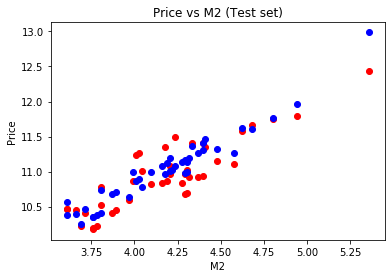

In [34]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], mr.predict(X_test), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [35]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [36]:
# Getting parameters
pr.coef_, pr.intercept_

(array([-0.16323159, -0.76303273,  0.38847601, -0.24723762, -0.00529037,
        -0.22503336,  0.16624378,  0.02726085, -0.76303273,  0.04531801,
         0.51232174,  0.38847601, -0.33745579,  0.16988297]),
 9.250493308429945)

In [37]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

In [38]:
# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.8531598748343103, 0.6506482514105806)

In [39]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(0.054701021175309096, 0.08197166097321844)

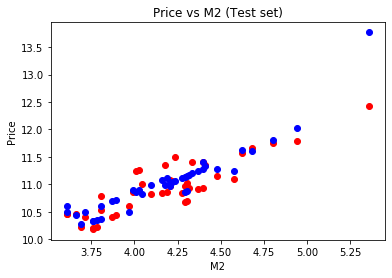

In [40]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [41]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()